In [18]:
# importing Data using Pandas library

df=pd.read_csv(r"C:\Users\umadevi\Downloads\archive (3).zip")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [19]:
# Dropping unnamed column

In [20]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
df.text[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [23]:
df.shape

(5171, 3)

In [24]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [25]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [26]:
# replace non-spam inplace of ham

In [27]:
df.loc[df["label_num"]==0,["label"]]='non-spam'

In [28]:
df

,label,text,label_num
0,non-spam,Subject: enron methanol ; meter # : 988291\r\n...,0
1,non-spam,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,non-spam,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,non-spam,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,non-spam,Subject: put the 10 on the ft\r\nthe transport...,0
5167,non-spam,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,non-spam,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,non-spam,Subject: industrial worksheets for august 2000...,0


In [29]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [30]:
# EDA

In [33]:
df[df['label']=='non-spam'].count()

label        3672
text         3672
label_num    3672
dtype: int64

In [34]:
df[df['label']=='spam'].count()

label        1499
text         1499
label_num    1499
dtype: int64

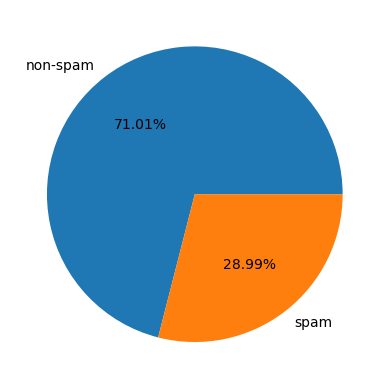

In [35]:
plt.pie([3672,1499],labels=['non-spam','spam'],autopct="%0.2f%%")
plt.show()

In [36]:
 df['text'].value_counts().head()

Subject: calpine daily gas nomination\r\n>\r\nricky a . archer\r\nfuel supply\r\n700 louisiana , suite 2700\r\nhouston , texas 77002\r\n713 - 830 - 8659 direct\r\n713 - 830 - 8722 fax\r\n- calpine daily gas nomination 1 . doc    20
Subject: \r\n                                                                                                                                                                                                                        16
Subject: \r\nthis week only : f . ree gen . erlc vlag . ra\r\ncover the shipping , and we ' ll send youour product at no cost to prove its\r\neffectiveness .\r\nwon ' t last . . . hurry\r\nstop promos .\r\n                        3
Subject: we ' ve found a school for you !\r\n                                                                                                                                                                                         3
Subject: you can be smart !\r\n                                         

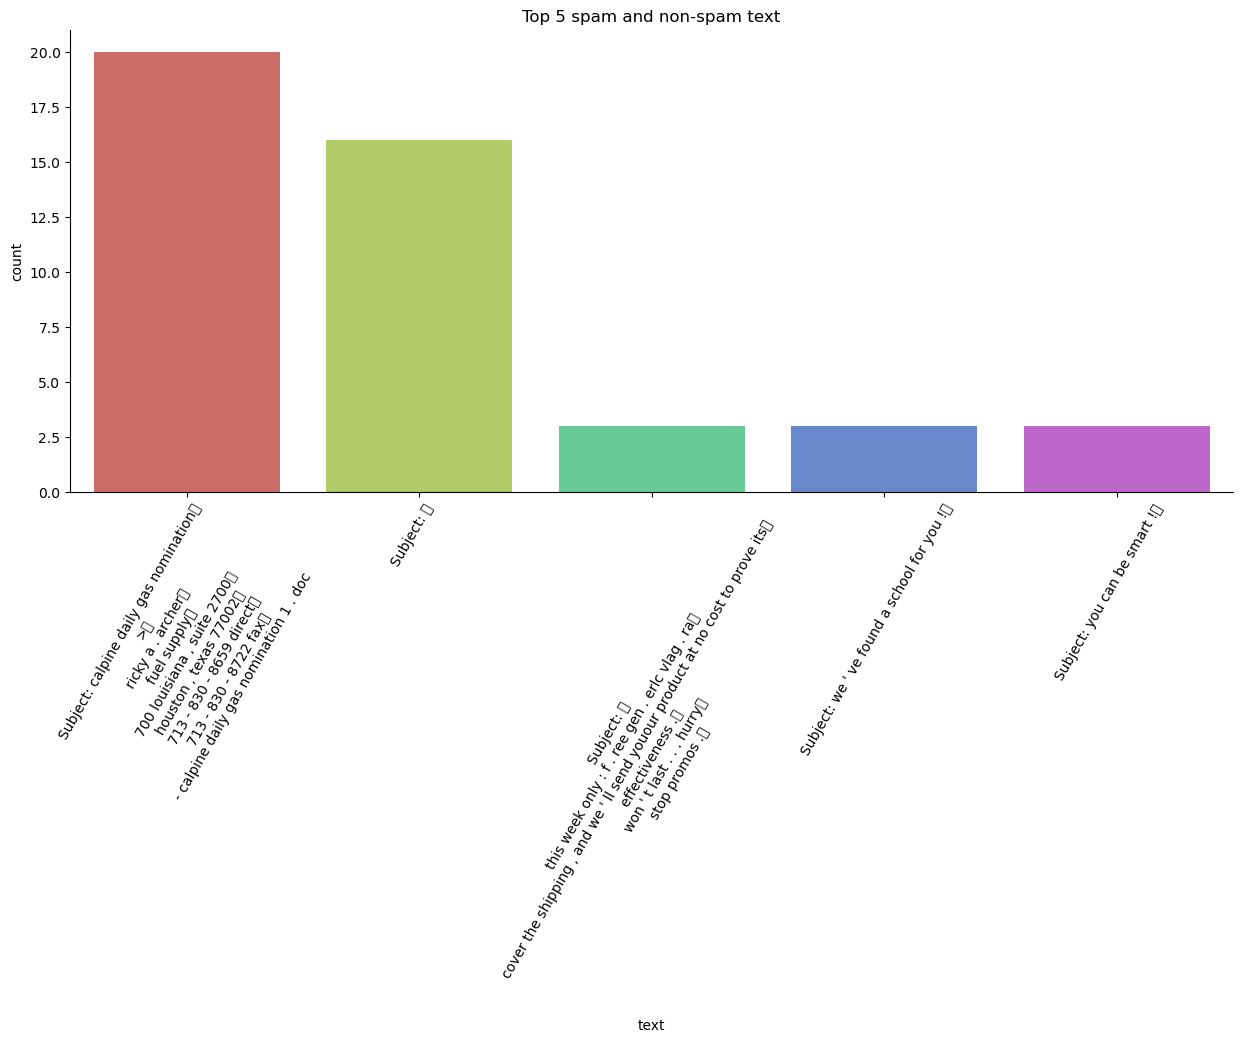

In [37]:
top_categories = df['text'].value_counts().head(5)
plt.figure(figsize = (15,6))
sns.countplot(x = df['text'], order = top_categories.index, palette = 'hls', )
plt.title("Top 5 spam and non-spam text")
plt.xticks(rotation = 420)
sns.despine()
plt.show()

In [38]:
# converting spam - 0 and non-spam - 1

In [39]:
df['label'].loc[df['label'] == 'spam'] = 0
df['label'].loc[df['label'] == 'non-spam'] = 1

In [40]:
X = df['text']
Y = df['label']

In [41]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [42]:
print(Y)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


In [43]:
# Splitting the data into training data & test data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [45]:
print(X_train.shape)
print(X_test.shape)

(4136,)
(1035,)


In [46]:
# Feature extraction

In [47]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

X_train_transformed = feature_extraction.fit_transform(X_train)
X_test_transformed = feature_extraction.transform(X_test)


In [48]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

print(y_train.shape)
print(y_test.shape)

(4136,)
(1035,)


In [49]:
print(X_test_transformed)

  (0, 43624)	0.13512686321787962
  (0, 43268)	0.10833660960605353
  (0, 41075)	0.12096674600753769
  (0, 39565)	0.10188725144329445
  (0, 39501)	0.3118923210296496
  (0, 39154)	0.12422340135939985
  (0, 38946)	0.018950541070485577
  (0, 38525)	0.08481685902012227
  (0, 38018)	0.08352915721085842
  (0, 37918)	0.09087024496070707
  (0, 37715)	0.1504944295855849
  (0, 36849)	0.06211973550290613
  (0, 36826)	0.07205513495571784
  (0, 36678)	0.13132404496188121
  (0, 34678)	0.11576601929181199
  (0, 34313)	0.09107511767034959
  (0, 34303)	0.12422340135939985
  (0, 32725)	0.12675389349953
  (0, 32230)	0.1281582796694795
  (0, 32223)	0.11907011031567737
  (0, 32218)	0.2137183924250268
  (0, 30502)	0.11999471032560592
  (0, 29300)	0.055923031890344886
  (0, 28045)	0.22723675877287497
  (0, 27061)	0.08684642663655563
  :	:
  (1034, 16167)	0.1215291152353375
  (1034, 16052)	0.41400159737005826
  (1034, 14047)	0.11692216400145229
  (1034, 13755)	0.05148325585044388
  (1034, 13656)	0.0436812108792

In [50]:
print(X_train_transformed)

  (0, 3871)	0.13387711316973605
  (0, 531)	0.14556222812251965
  (0, 30451)	0.08468916670398006
  (0, 43273)	0.14556222812251965
  (0, 3890)	0.14556222812251965
  (0, 548)	0.14556222812251965
  (0, 37262)	0.11275796314501375
  (0, 2908)	0.11535664415295803
  (0, 456)	0.14556222812251965
  (0, 26297)	0.09506000151609588
  (0, 36190)	0.11400727959297849
  (0, 2478)	0.13872687405852518
  (0, 521)	0.14556222812251965
  (0, 16808)	0.11843023142166303
  (0, 22041)	0.13387711316973605
  (0, 2706)	0.14556222812251965
  (0, 522)	0.14556222812251965
  (0, 32060)	0.07311834410351342
  (0, 19411)	0.04211028825505044
  (0, 2537)	0.13872687405852518
  (0, 517)	0.14556222812251965
  (0, 19429)	0.14556222812251965
  (0, 16637)	0.24438399643390496
  (0, 3875)	0.14556222812251965
  (0, 836)	0.14556222812251965
  :	:
  (4135, 8873)	0.07154271542163933
  (4135, 16161)	0.07327358549803296
  (4135, 26936)	0.07154271542163933
  (4135, 15691)	0.07812310961344454
  (4135, 14167)	0.07812310961344454
  (4135, 11

In [51]:
# Training the ml model

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train_transformed, y_train)

LogisticRegression()

In [54]:
prediction_tr = model.predict(X_train_transformed )
prediction_tr

array([1, 1, 1, ..., 1, 1, 0])

In [55]:
prediction_te = model.predict(X_test_transformed)
prediction_te

array([0, 0, 1, ..., 1, 0, 1])

In [56]:
# finding accuracy

In [57]:
accuracy= accuracy_score(y_train,prediction_tr)

In [58]:
accuracy

0.9970986460348162

In [59]:
accuracy1= accuracy_score(y_test,prediction_te)
accuracy1

0.9806763285024155

In [60]:

acc_sco = {'models': ['accuray_test','accuracy_train'],
           'Accuracy of models': [0.98067, 0.99709]}

df1 = pd.DataFrame(acc_sco)
df1

,models,Accuracy of models
0,accuray_test,0.98067
1,accuracy_train,0.99709
